In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [51]:
print('Importing packages...')
from datetime import datetime
import numpy as np
import pandas as pd
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

Importing packages...


In [0]:
data=pd.read_csv("/content/drive/My Drive/train_split.csv")

In [6]:
data.head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0,1,50.0,75.0,14,1,22515,73.1,28,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0,1,NaN,NaN,6,0,7624,23.2,13,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0,0,NaN,NaN,5,0,10877,31.2,19,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0,2,46.0,NaN,10,0,13712,55.5,21,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0,0,NaN,NaN,11,0,35835,76.2,27,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0,0.0,47159.0,47033.0,0
5,10247268,15000,15000,14950.0,36 months,BAT2575549,8.90,A,A5,Design Consultant,2 years,MORTGAGE,120000.0,Not Verified,n,> We are requesting this loan to help re-or...,debt_consolidation,Credit Card Debt Consolidation,461xx,IN,12.30,0,0,56.0,NaN,18,0,19040,64.5,30,f,1957.24,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,113th week,0,0.0,350619.0,29500.0,0
6,8089625,5000,5000,4975.0,36 months,,7.90,A,A4,TOYOTA OF NORTH HOLLYWOOD,5 years,RENT,75000.0,Source Verified,n,> Funds will be used to pay off a debt. I am a...,debt_consolidation,PAY THEM OFF,913xx,CA,5.70,0,0,NaN,105.0,13,2,13272,23.9,23,f,578.36,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,117th week,0,1023.0,13272.0,55500.0,1
7,23043116,6000,6000,6000.0,36 months,NaN,9.17,B,B1,Banker,8 years,MORTGAGE,54000.0,Not Verified,n,NaN,credit_card,Credit card refinancing,351xx,AL,11.63,0,1,46.0,NaN,13,0,3484,29.5,49,f,637.51,0.0,0.0,0.0,0.0,54.0,INDIVIDUAL,NaN,78th week,0,0.0,272579.0,11800.0,0
8,45900933,6000,6000,6000.0,36 months,BAT4136152,13.99,C,C4,LVN,7 years,MORTGAGE,92000.0,Not Verified,n,NaN,home_improvement,Home improvement,917xx,CA,30.85,0,0,77.0,NaN,16,0,47567,76.6,27,w,621.72,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,44th week,0,0.0,281521.0,62100.0,0
9,41272507,34550,34550,34550.0,60 months,BAT4694572,17.14,D,D4,Registered Nurse,2 years,MORTGAGE,72000.0,Verified,n,NaN,debt_consolidation,Debt consolidation,427xx,KY,33.92,0,0,NaN,NaN,12,0,30040,90.5,30,w,5535.46,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,52th week,0,0.0,76034.0,33200.0,0


In [9]:
data.shape

(63999, 45)

In [7]:
data.iloc[0]

member_id                                58189336
loan_amnt                                   14350
funded_amnt                                 14350
funded_amnt_inv                             14350
term                                    36 months
batch_enrolled                                   
int_rate                                    19.19
grade                                           E
sub_grade                                      E3
emp_title                                   clerk
emp_length                                9 years
home_ownership                                OWN
annual_inc                                  28700
verification_status               Source Verified
pymnt_plan                                      n
desc                                          NaN
purpose                        debt_consolidation
title                          Debt consolidation
zip_code                                    349xx
addr_state                                     FL


In [27]:
data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type',
       'verification_status_joint', 'last_week_pay', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status'],
      dtype='object')

In [0]:
dfTrain=data[['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type',
       'verification_status_joint', 'last_week_pay', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']]

In [29]:
print('Transform: term...')
dfTrain['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTrain['term'] = pd.to_numeric(dfTrain['term'], errors='coerce')


Transform: term...


In [30]:
print('Transform: emp_length...')
dfTrain['emp_length'].replace('n/a', '0', inplace=True)
dfTrain['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)

dfTrain['emp_length'] = pd.to_numeric(dfTrain['emp_length'], errors='coerce')


Transform: emp_length...


In [31]:
print('Transform: last_week_pay...')
dfTrain['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTrain['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dfTrain['last_week_pay'] = pd.to_numeric(dfTrain['last_week_pay'], errors='coerce')


Transform: last_week_pay...


In [32]:
print('Transform: sub_grade...')
dfTrain['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)

dfTrain['sub_grade'] = pd.to_numeric(dfTrain['sub_grade'], errors='coerce')

print('Transform done.')

Transform: sub_grade...
Transform done.


**Missing values imputation**

In [34]:
cols = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in cols:
    print('Imputation with Median: %s' % (col))
    dfTrain[col].fillna(dfTrain[col].median(), inplace=True)

cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in cols:
    print('Imputation with Zero: %s' % (col))
    dfTrain[col].fillna(0, inplace=True)

print('Missing value imputation done.')

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: last_week_pay
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: mths_since_last_major_derog
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim
Imputation with Median: emp_length
Imputation with Zero: acc_now_delinq
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Imputation with Zero: collection_recovery_fee
Imputation with Zero: collections_12_mths_ex_med
Missing value imputation done.


**Feature Engineering**

In [40]:
train_target = pd.DataFrame(dfTrain['loan_status'])

selected_cols = ['member_id', 'emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 
                 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 
                 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'mths_since_last_major_derog', 
                 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt', 'recoveries', 'collection_recovery_fee',
                 'term', 'acc_now_delinq', 'collections_12_mths_ex_med']
finalTrain = dfTrain[selected_cols]

# How big the loan a person has taken with respect to his earnings, annual income to loan amount ratio
finalTrain['loan_to_income'] = finalTrain['annual_inc']/finalTrain['funded_amnt_inv']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [42]:
finalTrain['bad_state'] = finalTrain['acc_now_delinq'] + (finalTrain['total_rec_late_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['recoveries']/finalTrain['funded_amnt_inv']) + (finalTrain['collection_recovery_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTrain['funded_amnt_inv'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
# a benifit of including above computations
finalTrain.loc[finalTrain['bad_state'] > 0, 'bad_state'] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [46]:
# Total number of available/unused 'credit lines'
finalTrain['avl_lines'] = finalTrain['total_acc'] - finalTrain['open_acc']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
# Interest paid so far
finalTrain['int_paid'] = finalTrain['total_rec_int'] + finalTrain['total_rec_late_fee']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
# Calculating EMIs paid (in terms of percent)
finalTrain['emi_paid_progress_perc'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
# Calculating total repayments received so far, in terms of EMI or recoveries after charge off
finalTrain['total_repayment_progress'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100) + ((finalTrain['recoveries']/finalTrain['funded_amnt_inv']) * 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Split data set into train-test-cv**

In [0]:
# Split train and cross validation sets
X_train, X_test, y_train, y_test = train_test_split(np.array(finalTrain), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

In [53]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

print(datetime.now()-st)

y_pred = clf.predict(X_test)

Initializing xgboost.sklearn.XGBClassifier and starting training...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.961571
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.963735
[2]	validation_0-auc:0.964013
[3]	validation_0-auc:0.964667
[4]	validation_0-auc:0.966891
[5]	validation_0-auc:0.967207
[6]	validation_0-auc:0.967583
[7]	validation_0-auc:0.968338
[8]	validation_0-auc:0.96859
[9]	validation_0-auc:0.9692
[10]	validation_0-auc:0.970337
[11]	validation_0-auc:0.970459
[12]	validation_0-auc:0.970567
[13]	validation_0-auc:0.970735
[14]	validation_0-auc:0.970831
[15]	validation_0-auc:0.970929
[16]	validation_0-auc:0.971096
[17]	validation_0-auc:0.971161
[18]	validation_0-auc:0.971205
[19]	validation_0-auc:0.971235
[20]	validation_0-auc:0.971274
[21]	validation_0-auc:0.971353
[22]	validation_0-auc:0.971302
[23]	validation_0-auc:0.971396
[24]	validation_0-auc:0.971333
[25]	validation_0-auc:0.971378
[26]	validation_0-auc:0.971432
[27]	validation_0-auc:0.971462
[28]	validation_0-auc:0.971663
[29]	validation_0-auc:0.971686
[30]	validation_0-a

In [54]:
accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))

Accuracy: 93.7656250000%


In [55]:
accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))

ROC-AUC: 91.8841339474%


**Graph Representation**

[0.13686    0.0119515  0.01212129 0.01074228 0.01200688 0.01946365
 0.01757509 0.01253522 0.0182662  0.01049345 0.01022799 0.0124944
 0.01226452 0.01254276 0.00997577 0.01541639 0.01632173 0.00934335
 0.1215123  0.01297252 0.01238393 0.00805028 0.28066838 0.
 0.04973375 0.         0.01045236 0.01445328 0.05288033 0.01271621
 0.01595756 0.02740046 0.02021611]
0 member_id
1 emp_length
2 loan_amnt
3 funded_amnt
4 funded_amnt_inv
5 sub_grade
6 int_rate
7 annual_inc
8 dti
9 mths_since_last_delinq
10 mths_since_last_record
11 open_acc
12 revol_bal
13 revol_util
14 total_acc
15 total_rec_int
16 total_rec_late_fee
17 mths_since_last_major_derog
18 last_week_pay
19 tot_cur_bal
20 total_rev_hi_lim
21 tot_coll_amt
22 recoveries
23 collection_recovery_fee
24 term
25 acc_now_delinq
26 collections_12_mths_ex_med
27 loan_to_income
28 bad_state
29 avl_lines
30 int_paid
31 emi_paid_progress_perc
32 total_repayment_progress


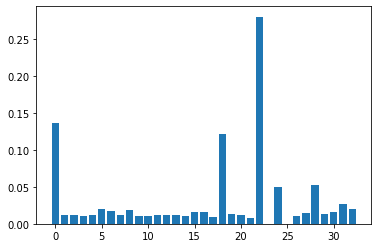

In [66]:
import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(finalTrain):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

Text(0.5, 0.98, 'Loan status')

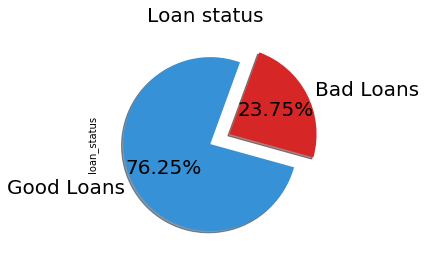

In [67]:
colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

dfTrain["loan_status"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=20, startangle=70)
plt.suptitle('Loan status', fontsize=20)


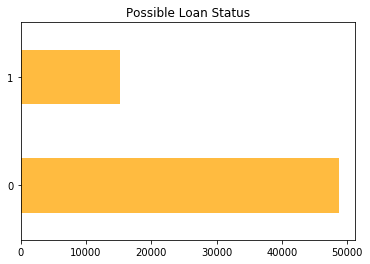

In [68]:
dfTrain['loan_status'].value_counts().plot(kind= 'barh', color = 'orange', title = 'Possible Loan Status', alpha = 0.75)
plt.show()